<a href="https://colab.research.google.com/github/viki6666/Pytorch_learn/blob/master/Dataload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

一、[从本地读取数据](https://oldpan.me/archives/how-to-load-dataset-in-correctly-pytorch)

Dataset类是Pytorch中图像数据集中最为重要的一个类，也是Pytorch中所有数据集加载类中应该继承的父类。其中父类中的两个私有成员函数必须被重载，否则将会触发错误提示：

def __getitem__(self, index):
def __len__(self):
其中__len__应该返回数据集的大小，而__getitem__应该编写支持数据集索引的函数，例如通过dataset[i]可以得到数据集中的第i+1个数据。

基本数据类：
_init_初始化：路径，参数设置，
_getitem_ 图像读取，增强，返回图像，
_len_图像数量

In [0]:
class ShipDataset(Dataset):
  def _init_(self,root,augment=None):
    self,image_files=np.array([x.path for x in os.scandir(root) if
                               x.name.endswith(".jpg")or x.name.endswith(".png") or x.name.endswith(".JPG")]
                              self.augment=augment#是否需要图像增强
  def _getitem_(self,index):
     #读取图像数据并返回
     #这里的open_image是读取图像函数，可以用PIL，opencv等库读取                         
     return open_image(self.image_files[index])

  def _getitem_(self,index):
      if self.augment
         image=open_image(self.image_file[index])
         image=self.augmet(image)#这里对图像进行增强
         return to_tensor(image) #将读取到的图像变成tensor传出  
      else:
         #如果不进行增强，直接读取数据并返回
          image=open_image(self.image_file[index])
          return to_tensor(image)                     
                              
     def _len_(self)
     #返回图像的数量                         
     return len(self.image_files)                           

DataLoader位于torch.utils.data.DataLoader, 为我们提供了对Dataset的读取操作  
dataset : 上面所实现的自定义类Dataset  
batch_size : 默认为1，每次读取的batch的大小
shuffle : 默认为False， 是否对数据进行shuffle操作(简单理解成将数据集打乱)  
num_works : 默认为0，表示在加载数据的时候每次使用子进程的数量，即简单的多线程预读数据的方法  
DataLoader返回的是一个迭代器，我们通过这个迭代器来获取数据

In [0]:
ship_train_dataset=ShipDataset(data_path,augment=transform)
# 利用dataloader读取我们的数据对象，并设定batch-size和工作现场
ship_train_loader = DataLoader(ship_train_dataset, batch_size=16, num_workers=4, shuffle=False, **kwargs)

In [0]:
for image in train_loader:
        optimizer.zero_grad()
        output = model(image)     # model模型处理(n,c,h,w)格式的数据，n为batch-size

二、从torchvision中读取数据
[详解](https://www.cnblogs.com/CATHY-MU/p/7760992.html)

50000
12500


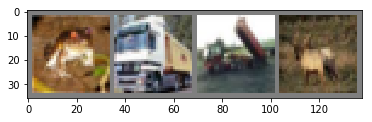

 frog truck truck  deer


In [10]:
#coding=utf-8
import torch
import torchvision
import torchvision.transforms as transforms
 
# torchvision输出的是PILImage，值的范围是[0, 1].
# 我们将其转化为tensor数据，并归一化为[-1, 1]。
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
 
#训练集，将相对目录./data下的cifar-10-batches-py文件夹中的全部数据（50000张图片作为训练数据）加载到内存中，若download为True时，会自动从网上下载数据并解压
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
 
#将训练集的50000张图片划分成12500份，每份4张图，用于mini-batch输入。shffule=True在表示不同批次的数据遍历时，打乱顺序。num_workers=2表示使用两个子进程来加载数据
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False, num_workers=2)
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
 
print(len(trainset)) 
print(len(trainloader)) 
 
 
 
#下面是代码只是为了给小伙伴们显示一个图片例子，让大家有个直觉感受。
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
#matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
 
 
 
 
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))
